# Graph Visualization and analysis
This notebook contains the analysis and various visualizations of the network dataset of various marvel super heroes based on their appearance in marvel comics.

In [1]:
import pandas as pd
import networkx as nx

`nodes.csv` file contains the names of all heros and comics.


`edges.csv` file contains the name of the hero and the comic they appeared.

In [2]:
nodes = pd.read_csv("nodes.csv")
edges = pd.read_csv("edges.csv")

In [3]:
nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19090 entries, 0 to 19089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   node    19090 non-null  object
 1   type    19090 non-null  object
dtypes: object(2)
memory usage: 298.4+ KB


In [4]:
G = nx.from_pandas_edgelist(edges, source='hero', target='comic')

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 19090
Number of edges: 96104
Average degree:  10.0685


# Analysis of nodes

In [6]:
dc_dict = nx.degree_centrality(G)
print("Frequent appearance of heros based on their degree centrality")
print("-------------------------------------------------------------")

counter = 0
for key in sorted(dc_dict, key = dc_dict.get, reverse=True):
    counter += 1
    print("{}. {} ---> {:.4f}".format(counter, key, dc_dict[key]))
    if counter == 10:
        break


Frequent appearance of heros based on their degree centrality
-------------------------------------------------------------
1. SPIDER-MAN/PETER PARKER ---> 0.0826
2. CAPTAIN AMERICA ---> 0.0699
3. IRON MAN/TONY STARK ---> 0.0602
4. THING/BENJAMIN J. GR ---> 0.0504
5. THOR/DR. DONALD BLAK ---> 0.0501
6. HUMAN TORCH/JOHNNY S ---> 0.0464
7. MR. FANTASTIC/REED R ---> 0.0447
8. HULK/DR. ROBERT BRUC ---> 0.0437
9. WOLVERINE/LOGAN ---> 0.0429
10. INVISIBLE WOMAN/SUE ---> 0.0399


In [13]:
ev_dict = nx.eigenvector_centrality(G, 300)
print("Frequent appearance of heros based on their eigen vector centrality")
print("-------------------------------------------------------------------")

counter = 0
for key in sorted(ev_dict, key = ev_dict.get, reverse=True):
    counter += 1
    print("{}. {} ---> {:.4f}".format(counter, key, ev_dict[key]))
    if counter == 10:
        break


Frequent appearance of heros based on their eigen vector centrality
-------------------------------------------------------------------
1. CAPTAIN AMERICA ---> 0.2260
2. IRON MAN/TONY STARK ---> 0.1796
3. THING/BENJAMIN J. GR ---> 0.1776
4. HUMAN TORCH/JOHNNY S ---> 0.1724
5. MR. FANTASTIC/REED R ---> 0.1678
6. INVISIBLE WOMAN/SUE ---> 0.1581
7. THOR/DR. DONALD BLAK ---> 0.1517
8. SCARLET WITCH/WANDA ---> 0.1512
9. VISION ---> 0.1466
10. WASP/JANET VAN DYNE ---> 0.1366


# Visualization

The below cells contain various representations of a subgraph of the given network

In [14]:
import igraph

In [15]:
sub_graph = nx.from_pandas_edgelist(edges[:100], source='hero', target='comic')

g = igraph.Graph.from_networkx(sub_graph)

------- Large layout ---------


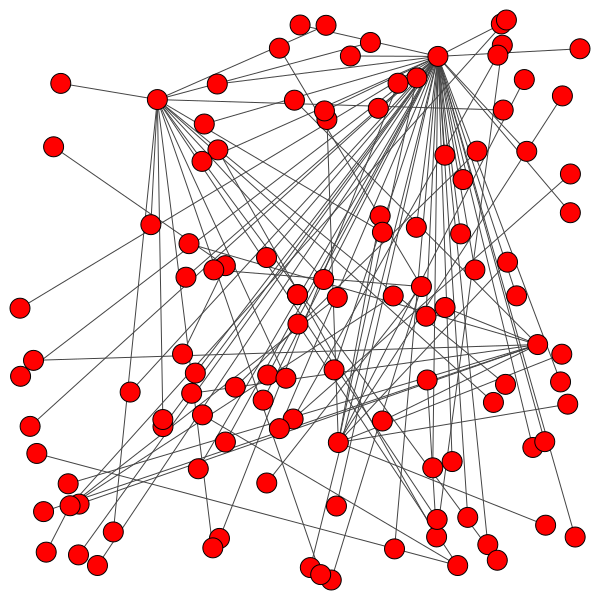

In [17]:
print("------- Large layout ---------")
igraph.plot(g, layout = g.layout_lgl())

------------- Kamada Kawai layout -------------


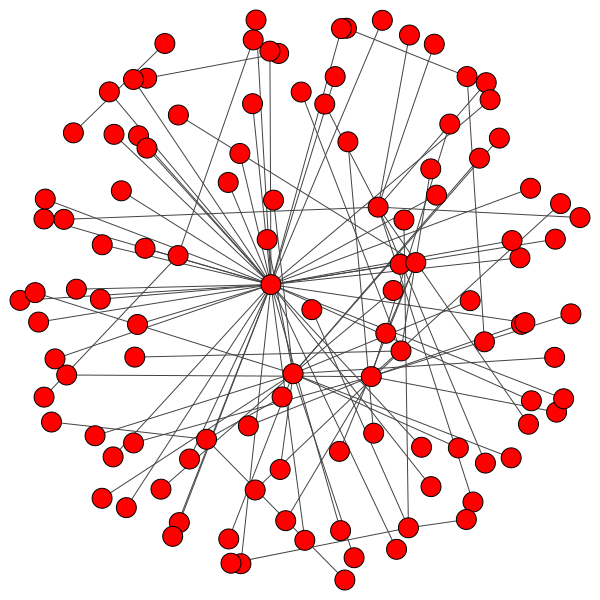

In [18]:
print("------------- Kamada Kawai layout -------------")

igraph.plot(g, layout = g.layout("kk"))

---------- Circular layout -------------- 


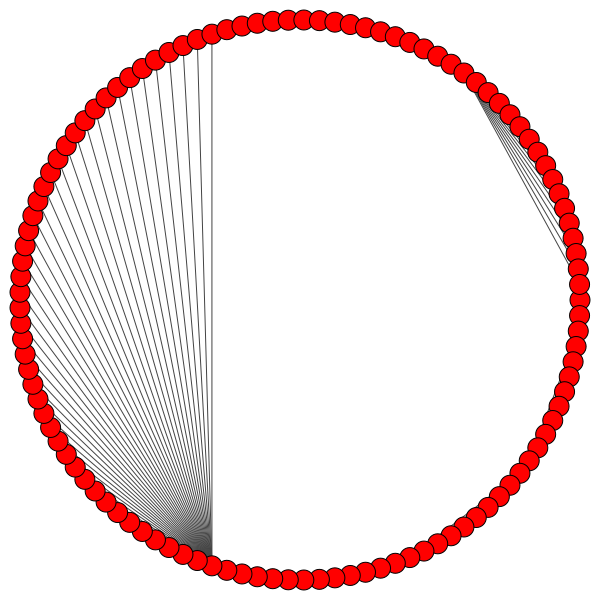

In [19]:
print("---------- Circular layout -------------- ")
igraph.plot(g, layout = g.layout_circle())

----------- Fruchterman Reingold layout --------- 


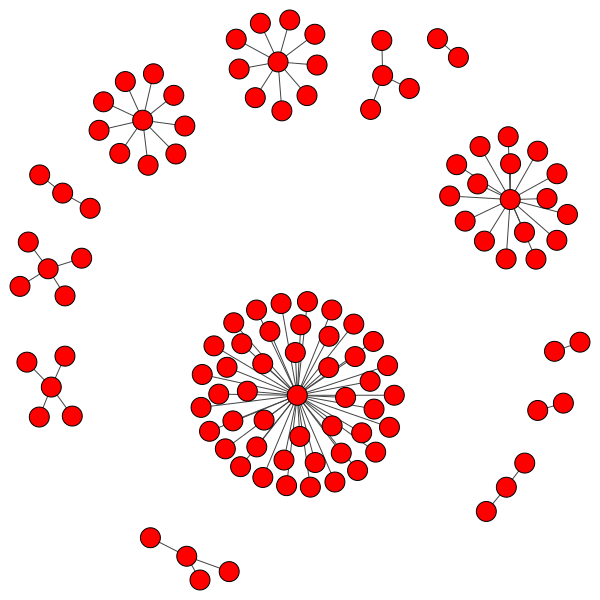

In [20]:
print("----------- Fruchterman Reingold layout --------- ")
igraph.plot(g, layout = g.layout("fr"))

----------- Grid Fruchterman Reingold layout --------- 


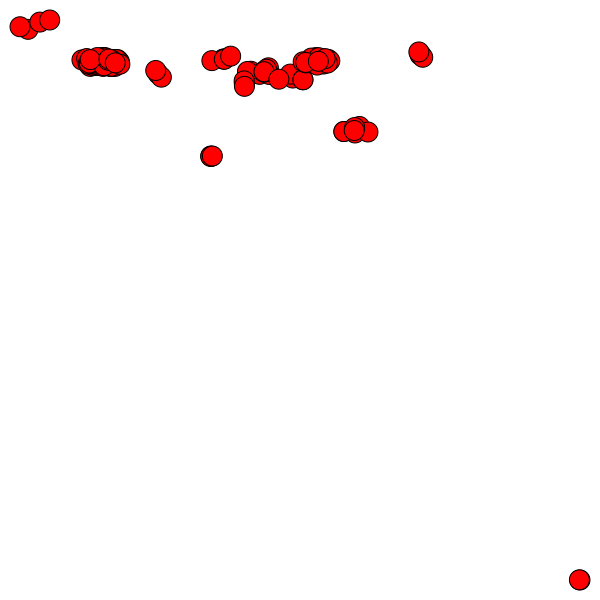

In [21]:
print("----------- Grid Fruchterman Reingold layout --------- ")
igraph.plot(g, layout = g.layout("grid_fr"))

 ---------- Reingold Tilford layout -------- 


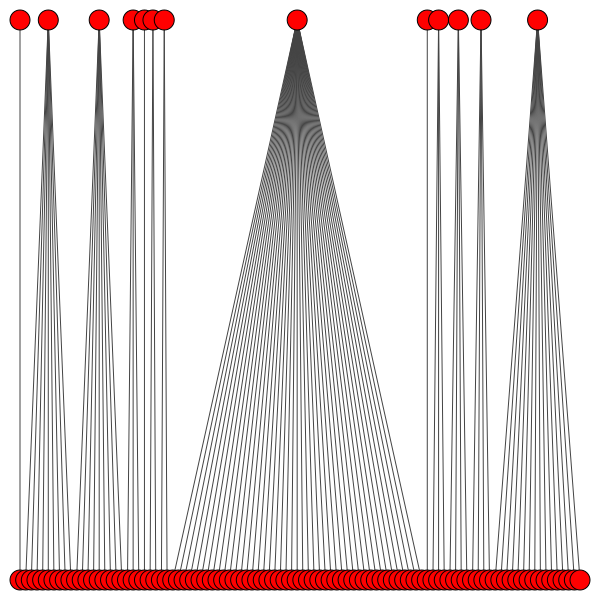

In [22]:
print(" ---------- Reingold Tilford layout -------- ")
igraph.plot(g, layout = g.layout("tree"))

 -------------- Reingold Tilford Circular layout -------------


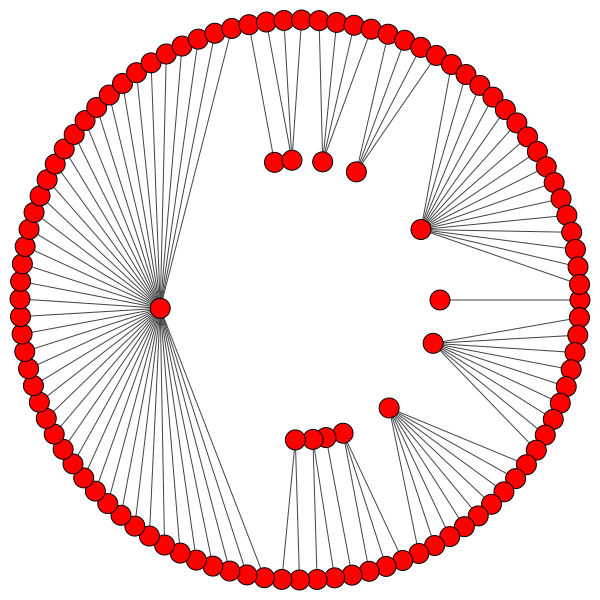

In [23]:
print(" -------------- Reingold Tilford Circular layout -------------")
igraph.plot(g, layout = g.layout("rt_circular"))